In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated
print("Hello World")
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()
from tqdm import tqdm
import numpy as np
import wfdb

Hello World
---Run time is 0.00010610000003907771 seconds ---



In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:
# import os
# cwd = os.getcwd()
# print(cwd)
# os.chdir('/Users/chenc/000---STT450-Jupyter Notebook/000--STT450-550/') 
#data = load_breast_cancer(as_frame = True); 
#df = data.frame; 
#print(df.shape)
# In this block use the code we looked at on 6/30 as a reference to save our rr-intervals as a .
rlist = []
records = 'mit-bih-raw\RECORDS' # Replace the _______ with the name of the records file in your MIT-BIH data folder
with open(records) as rfile: #Then we open the file 
                             #The 'with' command only opens the file while we are in it. Automatically closes the file when we're not
    for record in rfile:  # Then we iterate through the lines in the file
        record = record[0:len(record)-1] # Remove any erronious new line characters at the end ('\n')
        rlist.append(record) # Then build an array with it
        

###### Step 1: Initialize all Arrays
             # Below, replace all of the ___ with the command that declares an array/list
             # hint: https://stackoverflow.com/questions/1514553/how-to-declare-an-array-in-python
samples = [] # will house the samples of all subjects
good_list = [] # will list the names of the subjects we successfully extracted
bad_list = [] # will house the names of the subjects we failed to extract
qrs = [] # will house the indices of R-Peaks for all subjects
atr_label = [] # will house the labels for each rhythm annotation for all subjects
atr_locs = [] # will house the locations corresponding to the rhythm annotation labels


###### Step 2: Extract Information
for x in tqdm(rlist): #this will iterate through te records that we found above
  
    try: # A try statement will run the except statement if for some reason the try commands fail
         # In this case I use the try statement because one of the subjects has no signal data causing failure
         # I then use bad_list and good_list so that all of the indices in rlist match with the arrays we initialized in Step 1, above
        ######################################################
            # Below find the wfdb function that will return the information that is described below 
        # Then replace _____ with the correct function call
        samp = wfdb.rdsamp('mit-bih-raw/'+x) # wfdb._____(file_location) will read the signal & header data and return a 2 value array
            # samp[0] - the signal data is the raw reading from the ecg. Each value is a sample taken.
            # samp[1] - the header data includes things about the signal data such as:
              # samples per section, denoted 'fs'
              # number of signals, denoted 'n_sig'
            
        ######################################################
        samples.append(samp) #add it to our array for all subject
            #What is our file extension that has the annotation we want? Find it here and replace _____ with it 
            #hint: READ THE VARIABLE NAMES!!!!
        qrs_tmp = wfdb.rdann('mit-bih-raw/'+x, extension='qrs') #extract the QRS Info
        qrs_locs = np.array(qrs_tmp.sample, dtype='int') #Get just the loccation of R-Peaks from the QRS Info
        qrs.append(qrs_locs) # Add to our array for all subjects
        
            #Do the same thing here
        atr = wfdb.rdann('mit-bih-raw/'+x,extension='atr') #extract the atr info which stores the rhythm type(s) over the whole signal
        atr_label.append(atr.aux_note) # aux_note stores the type of rhythm - main two are '(N' for normal and '(AFIB' for AFIB
        atr_locs.append(np.append(atr.sample, len(samp[0]))) #I add the length of the whole sample to the end for better visualization later
        
        good_list.append(x) # when all extraction is successful append the record name to good_list
    except Exception as exep:
        print(exep) # Alert the user of an exception
        bad_list.append(x) # add to the bad list

        

  0%|          | 0/25 [00:00<?, ?it/s]

sampto must be greater than sampfrom
sampto must be greater than sampfrom


100%|██████████| 25/25 [00:21<00:00,  1.17it/s]


In [10]:
# df3 = pd.read_csv('Data/Carseats.csv')
# #df3.info()
# print(); df3.head(5)
features_df_list = []
for subject in good_list:
    data = pd.read_csv(f'subject-features-dataframes/subject{subject}.csv')
    data = data.assign(Subject = subject)
    #print(data)
    features_df_list.append(data)
features_maindf = pd.concat(features_df_list, ignore_index = True)

In [11]:
x_values = ['StoS', 'StoR', 'StoL', 'RtoS', 'RtoR', 'RtoL', 'LtoS',
       'LtoR', 'LtoL', 'STD', 'CoefVar', 'Range', 'Volatility', 'ShEn',
       'AppEn', 'SampEn']
y_values = ['Rhythm']

In [7]:
# #X = df2.loc[:, ["student", "balance", "income"]] #student; balance; income
# X = df2.loc[:, ["balance", "income"]] #student; balance; income
# y = df2.loc[:, "default"] #default

In [8]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
neighbors_list = []
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])
for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]
    
    temp_model = neighbors.KNeighborsClassifier(n_neighbors = 1)    
    param_distributions = {'n_neighbors': randint(1, 15)}

    search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
    search.fit(X_train, y_train)

    neighbors_list.append(search.best_params_['n_neighbors'])

    knn = neighbors.KNeighborsClassifier(n_neighbors = search.best_params_['n_neighbors'])

    model = knn.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
# crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
# knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
# model = knn.fit(X, y)
# scores = cross_val_score(model, X, y, cv=crossvalidation)
# print('Accuracy of each fold: \n {}'.format(scores))
# print()
# print("Avg accuracy: {}".format(scores.mean()))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
print(elapsed)
print(neighbors_list)
temp_list = []
temp_idx = []
neighbors_best = []
for acc in acc_score:
    if acc >= 0.95:
        temp_list.append(acc)
        temp_idx.append(acc_score.index(acc))
for idx in temp_idx:
    neighbors_best.append(neighbors_list[idx])

23it [06:28, 16.87s/it]

---Run time is 406.45894569999655 seconds ---

Accuracy of each fold: 
 [0.9170480549199085, 0.9432048681541582, 0.9955919395465995, 0.9154676258992805, 0.9947753396029259, 0.949290060851927, 0.8351237739374124, 0.9979577944179714, 0.9377510040160643, 0.9647188533627343, 0.9836660617059891, 0.990667623833453, 0.7532879818594105, 0.9777070063694268, 0.5362198168193172, 0.9844926894107222, 0.9890335846470185, 0.9826889786497404, 0.724429416737109, 0.9752611324903794, 0.9935842600513259, 0.9918392969240427, 0.9961945031712474]

Avg accuracy : 
0.9273913768425288

Std of accuracy : 
0.11132911914138095
[0.9170480549199085, 0.9432048681541582, 0.9955919395465995, 0.9154676258992805, 0.9947753396029259, 0.949290060851927, 0.8351237739374124, 0.9979577944179714, 0.9377510040160643, 0.9647188533627343, 0.9836660617059891, 0.990667623833453, 0.7532879818594105, 0.9777070063694268, 0.5362198168193172, 0.9844926894107222, 0.9890335846470185, 0.9826889786497404, 0.724429416737109, 0.97526113249037

In [9]:
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

[0.9170480549199085, 0.9432048681541582, 0.9955919395465995, 0.9154676258992805, 0.9947753396029259, 0.949290060851927, 0.8351237739374124, 0.9979577944179714, 0.9377510040160643, 0.9647188533627343, 0.9836660617059891, 0.990667623833453, 0.7532879818594105, 0.9777070063694268, 0.5362198168193172, 0.9844926894107222, 0.9890335846470185, 0.9826889786497404, 0.724429416737109, 0.9752611324903794, 0.9935842600513259, 0.9918392969240427, 0.9961945031712474]
[[22871  1872]
 [ 1797 18428]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     24743
           1       0.91      0.91      0.91     20225

    accuracy                           0.92     44968
   macro avg       0.92      0.92      0.92     44968
weighted avg       0.92      0.92      0.92     44968



# SampEn 

In [14]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];

from sklearn.inspection import permutation_importance
x_values = ['SampEn','AppEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']
#for df in features_df_list:

zero_values_list = [0] * len(x_values)

perm_imp_dict = dict(zip(x_values,zero_values_list))

# Initialize dataframe with zeros
average_importance = pd.DataFrame({'Importance':np.zeros(len(x_values))}, 
                                  index = x_values)

counts = pd.DataFrame({'Count':np.zeros(len(x_values))}, 
                                  index = x_values)


#neighbors_list = []
import statistics
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])
for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]
    
#     temp_model = neighbors.KNeighborsClassifier(n_neighbors = 1)    
#     param_distributions = {'n_neighbors': randint(1, 15)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     neighbors_list.append(search.best_params_['n_neighbors'])

    knn = neighbors.KNeighborsClassifier(n_neighbors = 8)

    model = knn.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    for i in range(0,len(x_values)):
        perm_imp_dict[x_values[i]] += result.importances_mean[i]*100

     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
# crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
# knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
# model = knn.fit(X, y)
# scores = cross_val_score(model, X, y, cv=crossvalidation)
# print('Accuracy of each fold: \n {}'.format(scores))
# print()
# print("Avg accuracy: {}".format(scores.mean()))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
print(elapsed)
# temp_list = []
# temp_idx = []
# neighbors_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     neighbors_best.append(n_estimators_list[idx])

for i in range(0,len(x_values)):
    perm_imp_dict[x_values[i]] = perm_imp_dict[x_values[i]] / 23

perm_imp_dict["KNN"] = 100
perm_imp_df = pd.DataFrame([perm_imp_dict])

perm_imp_df_t = perm_imp_df.T
perm_imp_df_t.columns = ["Importance"]
perm_imp_df_t.sort_values(by=['Importance'],ascending=False)

perm_imp_df_t.to_csv('perm_imp.csv',mode='a',header=False)

perm_imp_df_t = perm_imp_df_t.drop(["KNN"])

23it [03:36,  9.40s/it]

---Run time is 561.4130201 seconds ---

Accuracy of each fold: 
 [0.9130434782608695, 0.9557809330628804, 0.9918136020151134, 0.6834532374100719, 0.9801462904911181, 0.9663286004056795, 0.7580569827183559, 0.9911504424778761, 0.9181726907630522, 0.9547960308710033, 0.9791288566243194, 0.9806173725771715, 0.7383219954648526, 0.9961783439490446, 0.6915070774354705, 0.9034116083296411, 0.9897189856065799, 0.9976918638199653, 0.9209636517328825, 0.9736118746564046, 0.9833190761334474, 0.9692404268675455, 0.9780126849894292]

Avg accuracy : 
0.9223680915940338

Std of accuracy : 
0.0983811207105232
[0.9130434782608695, 0.9557809330628804, 0.9918136020151134, 0.6834532374100719, 0.9801462904911181, 0.9663286004056795, 0.7580569827183559, 0.9911504424778761, 0.9181726907630522, 0.9547960308710033, 0.9791288566243194, 0.9806173725771715, 0.7383219954648526, 0.9961783439490446, 0.6915070774354705, 0.9034116083296411, 0.9897189856065799, 0.9976918638199653, 0.9209636517328825, 0.9736118746564046

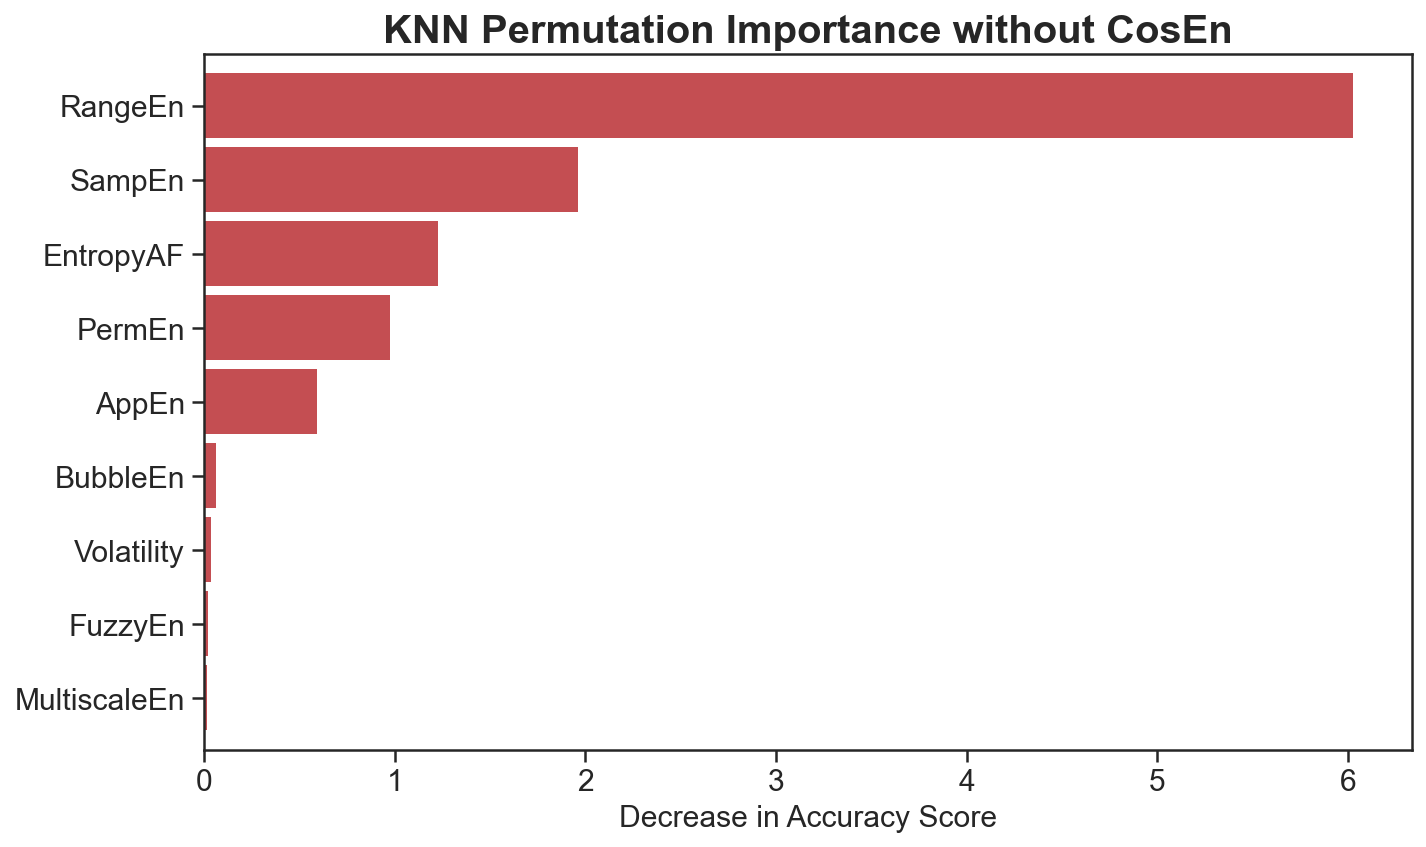

In [15]:
import matplotlib as mpl

df62 = perm_imp_df_t.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df62.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Decrease in Accuracy Score", fontsize=15)
ax.set_title("KNN Permutation Importance without CosEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlim(0)
plt.tight_layout()
plt.show()


In [16]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
print(acc_score)
print(elapsed)

confusion_matrix1 = pd.DataFrame(confusion_matrix(Truth, Output))
acc_score1 = pd.DataFrame([acc_score])

confusion_matrix1.to_csv("model_results/KNN_cm.csv",index=False)
acc_score1 = pd.DataFrame([acc_score])
acc_score1 = acc_score1.T
acc_score1.columns = ["Accuracy"]
acc_score1.to_csv("model_results/KNN_accuracy.csv",index=False)

[[22880  1863]
 [ 1845 18380]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     24743
           1       0.91      0.91      0.91     20225

    accuracy                           0.92     44968
   macro avg       0.92      0.92      0.92     44968
weighted avg       0.92      0.92      0.92     44968

[0.9130434782608695, 0.9557809330628804, 0.9918136020151134, 0.6834532374100719, 0.9801462904911181, 0.9663286004056795, 0.7580569827183559, 0.9911504424778761, 0.9181726907630522, 0.9547960308710033, 0.9791288566243194, 0.9806173725771715, 0.7383219954648526, 0.9961783439490446, 0.6915070774354705, 0.9034116083296411, 0.9897189856065799, 0.9976918638199653, 0.9209636517328825, 0.9736118746564046, 0.9833190761334474, 0.9692404268675455, 0.9780126849894292]
561.4130201


# CosEn

In [18]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];

from sklearn.inspection import permutation_importance
x_values = ['CosEn','AppEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']
#for df in features_df_list:

zero_values_list = [0] * len(x_values)

perm_imp_dict = dict(zip(x_values,zero_values_list))

# Initialize dataframe with zeros
average_importance = pd.DataFrame({'Importance':np.zeros(len(x_values))}, 
                                  index = x_values)

counts = pd.DataFrame({'Count':np.zeros(len(x_values))}, 
                                  index = x_values)


#neighbors_list = []
import statistics
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])
for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]
    
#     temp_model = neighbors.KNeighborsClassifier(n_neighbors = 1)    
#     param_distributions = {'n_neighbors': randint(1, 15)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     neighbors_list.append(search.best_params_['n_neighbors'])

    knn = neighbors.KNeighborsClassifier(n_neighbors = 8)

    model = knn.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    for i in range(0,len(x_values)):
        perm_imp_dict[x_values[i]] += result.importances_mean[i]*100

     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
# crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
# knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
# model = knn.fit(X, y)
# scores = cross_val_score(model, X, y, cv=crossvalidation)
# print('Accuracy of each fold: \n {}'.format(scores))
# print()
# print("Avg accuracy: {}".format(scores.mean()))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
print(elapsed)
# temp_list = []
# temp_idx = []
# neighbors_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     neighbors_best.append(n_estimators_list[idx])

for i in range(0,len(x_values)):
    perm_imp_dict[x_values[i]] = perm_imp_dict[x_values[i]] / 23


23it [03:35,  9.36s/it]

---Run time is 2369.9817398 seconds ---

Accuracy of each fold: 
 [0.9130434782608695, 0.9557809330628804, 0.9918136020151134, 0.6834532374100719, 0.9801462904911181, 0.9663286004056795, 0.7580569827183559, 0.9911504424778761, 0.9181726907630522, 0.9547960308710033, 0.9791288566243194, 0.9806173725771715, 0.7383219954648526, 0.9961783439490446, 0.6915070774354705, 0.9034116083296411, 0.9897189856065799, 0.9976918638199653, 0.9209636517328825, 0.9736118746564046, 0.9833190761334474, 0.9692404268675455, 0.9780126849894292]

Avg accuracy : 
0.9223680915940338

Std of accuracy : 
0.0983811207105232
[0.9130434782608695, 0.9557809330628804, 0.9918136020151134, 0.6834532374100719, 0.9801462904911181, 0.9663286004056795, 0.7580569827183559, 0.9911504424778761, 0.9181726907630522, 0.9547960308710033, 0.9791288566243194, 0.9806173725771715, 0.7383219954648526, 0.9961783439490446, 0.6915070774354705, 0.9034116083296411, 0.9897189856065799, 0.9976918638199653, 0.9209636517328825, 0.973611874656404

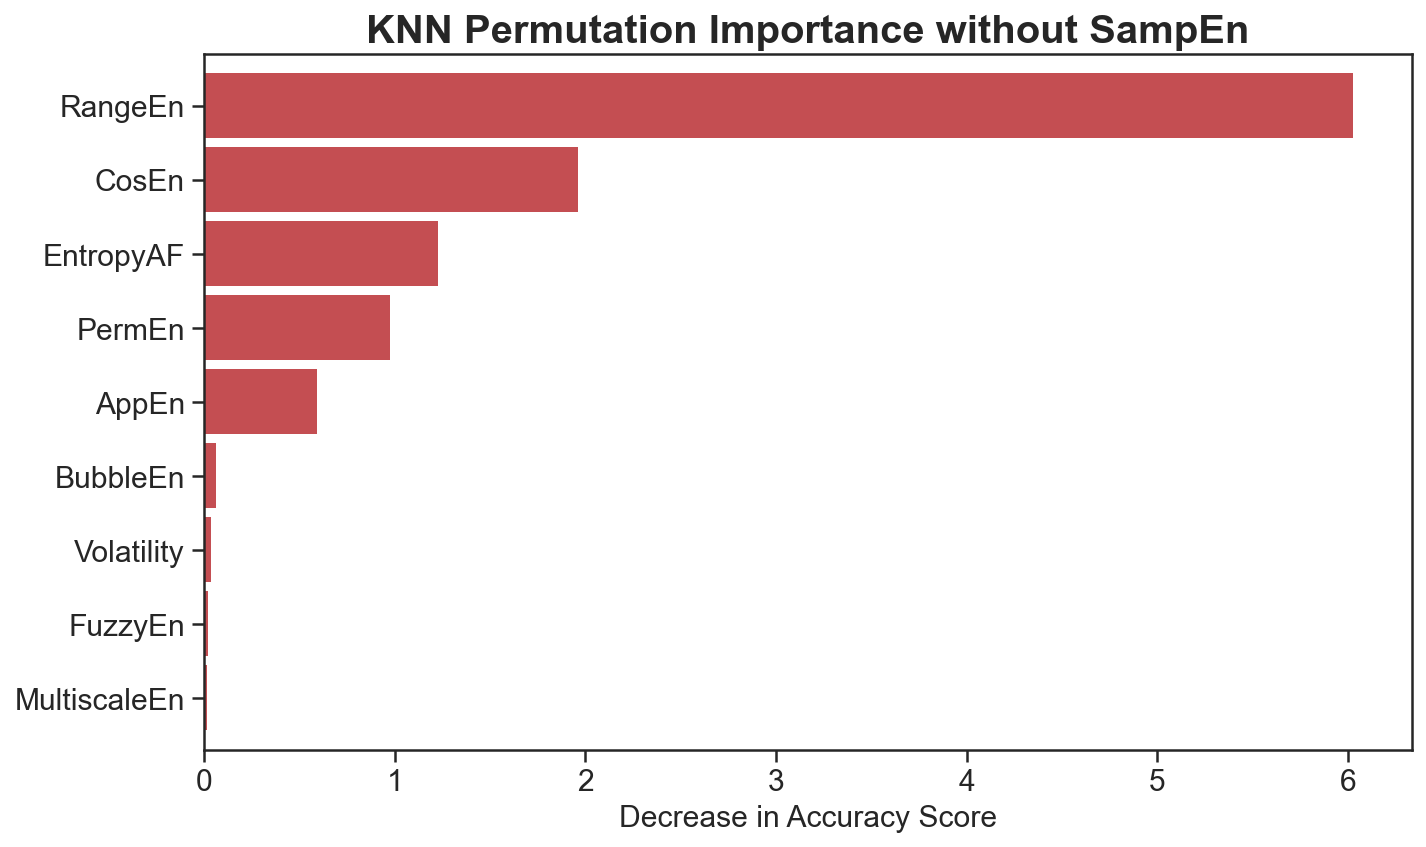

In [19]:
import matplotlib as mpl

perm_imp_df = pd.DataFrame([perm_imp_dict])

perm_imp_df_t = perm_imp_df.T
perm_imp_df_t.columns = ["Importance"]
perm_imp_df_t.sort_values(by=['Importance'],ascending=False)


df62 = perm_imp_df_t.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df62.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Decrease in Accuracy Score", fontsize=15)
ax.set_title("KNN Permutation Importance without SampEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlim(0)
plt.tight_layout()
plt.show()
